<a href="https://colab.research.google.com/github/Gautam-Jaiswal/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Stock%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References :- 'https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/'

In [ ]:
pip install yfinance

#GETTING AND CLEANSING OF DATA

In [2]:
import pandas as pd
import numpy as np
from numpy import array
import yfinance as yf

from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px

import urllib.request
from PIL import Image

from skimage import io

import matplotlib.pyplot as plt

In [3]:
stock_name = input("Please enter Stock Name :- ")

Please enter Stock Name :- AAPL


In [4]:
df = yf.download(tickers=stock_name, period='10y' , interval='1d')
df_charts = yf.download(tickers=stock_name, period='5y' , interval='1d')

tick = yf.Ticker(stock_name)
share_holders = tick.institutional_holders
news = tick.news
info = tick.info

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Remove any null values if present

In [5]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
if(not all(df.isna().sum())):
  print('GOOD DATA-SET')
else:
  print('CLEARING DATA-SET.............')
  pd.df.dropna(axis = 0, how ='any', inplace=True)

GOOD DATA-SET


In [7]:
df.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-11-12,19.791071,19.803572,19.237499,19.386786,16.672396,515802000
2012-11-13,19.246786,19.660000,19.155714,19.389286,16.674549,532949200
2012-11-14,19.482143,19.551786,19.149286,19.174286,16.489649,477170400
2012-11-15,19.197500,19.267857,18.665001,18.772142,16.143812,789910800


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-07,137.110001,139.149994,135.669998,138.919998,138.919998,83374600
2022-11-08,140.410004,141.429993,137.490005,139.500000,139.500000,89908500
2022-11-09,138.500000,138.550003,134.589996,134.869995,134.869995,74917800
2022-11-10,141.240005,146.869995,139.500000,146.869995,146.869995,118854000
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800


#EDA

In [ ]:
info['longBusinessSummary']

In [ ]:
fig_1 = go.Figure(data=[go.Candlestick(x=df_charts.index,
                open=df_charts['Open'],
                high=df_charts['High'],
                low=df_charts['Low'],
                close=df_charts['Close'])])
fig_1.update_layout(
    title=f'CANDLE STICK CHART FOR {stock_name} STOCK',
    yaxis_title='VALUE OF STOCK IN USD($)')

fig_1.show()

In [11]:
fig = px.line(df_charts, x=df_charts.index, y='High', title=f'LINE CHART OF {stock_name} STOCK')

fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [12]:
px.histogram(x = share_holders.Holder, y = share_holders.Value,
             color = share_holders.Holder,
             labels = {'x' : "Share Holder's Names", 'y': "Value of Shares"})

In [13]:
news_title = [None] *4
news_link = [None] *4
news_thumbnail = [None] *4
for i in range(0,4):
  news_title[i] = news[i]['title']
  news_link[i] = news[i]['link']
  news_thumbnail[i] = news[i]['thumbnail']['resolutions'][0]['url']

In [14]:
img = [None] *4
for i in range(0,4):
  urllib.request.urlretrieve(news_thumbnail[i], f'n{i}.png')
  temp = Image.open(f'n{i}.png')
  basewidth = 300
  wpercent = (basewidth / float(temp.size[0]))
  hsize = int((float(temp.size[1]) * float(wpercent)))
  img[i] = temp.resize((basewidth, hsize), Image.ANTIALIAS)

‘Once-in-a-lifetime opportunity’: How a mass lockdown at the world’s biggest iPhone factory is India’s big chance to beat out China as Apple’s favorite supplier
https://finance.yahoo.com/news/once-lifetime-opportunity-mass-lockdown-113000906.html


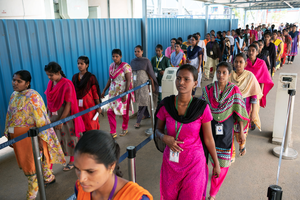

In [15]:
print(news_title[0])
print(news_link[0])
img[0]

Coinbase, Meta, Disney: Stocks That Defined the Week
https://finance.yahoo.com/m/ecb5a912-a83f-312f-bc88-aa78b8767835/coinbase%2C-meta%2C-disney%3A.html


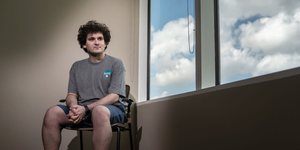

In [16]:
print(news_title[1])
print(news_link[1])
img[1]

Warren Buffett Stocks: What's Inside Berkshire Hathaway's Portfolio?
https://finance.yahoo.com/m/ce2ffe06-f882-3e0d-8b97-fa77d137e8bb/warren-buffett-stocks%3A-what%27s.html


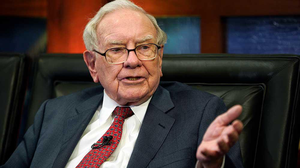

In [17]:
print(news_title[2])
print(news_link[2])
img[2]

Is Apple Stock A Buy Amid Holiday Season Shopping?
https://finance.yahoo.com/m/7c66194e-24f9-3ffe-bb29-a4dea96f7065/is-apple-stock-a-buy-amid.html


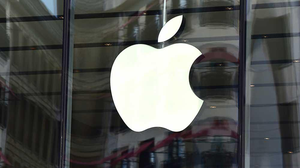

In [18]:
print(news_title[3])
print(news_link[3])
img[3]

#DATA PREPARATION FOR MODEL BUILDING

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
df_close_values = df.reset_index()['Close'][:-20]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close_values = scaler.fit_transform(np.array(df_close_values).reshape(-1,1))
df_close_values

In [22]:
##splitting dataset into train and test split
training_size = int(len(df_close_values)*0.8)
test_size = len(df_close_values)-training_size
train_data = df_close_values[0:training_size,:]
test_data = df_close_values[training_size:len(df_close_values),:1]

In [23]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [24]:
time_step = 80
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# LSTM MODEL BUILDING

In [26]:
### Create the Stacked LSTM model
import math
from sklearn.metrics import mean_squared_error

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [27]:
model=Sequential()
model.add(LSTM(45,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(45,return_sequences=True))
model.add(LSTM(45,return_sequences=True))
model.add(LSTM(45))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 45)            8460      
                                                                 
 lstm_1 (LSTM)               (None, 80, 45)            16380     
                                                                 
 lstm_2 (LSTM)               (None, 80, 45)            16380     
                                                                 
 lstm_3 (LSTM)               (None, 45)                16380     
                                                                 
 dense (Dense)               (None, 1)                 46        
                                                                 
Total params: 57,646
Trainable params: 57,646
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=10)

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14/14 [==============================] - 0s 7ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
math.sqrt(mean_squared_error(y_train,train_predict))

44.39564299602002

In [33]:
math.sqrt(mean_squared_error(y_test,test_predict))

143.79284633858046

In [34]:
### Plotting 
look_back=time_step

# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_close_values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close_values)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close_values)-1, :] = test_predict

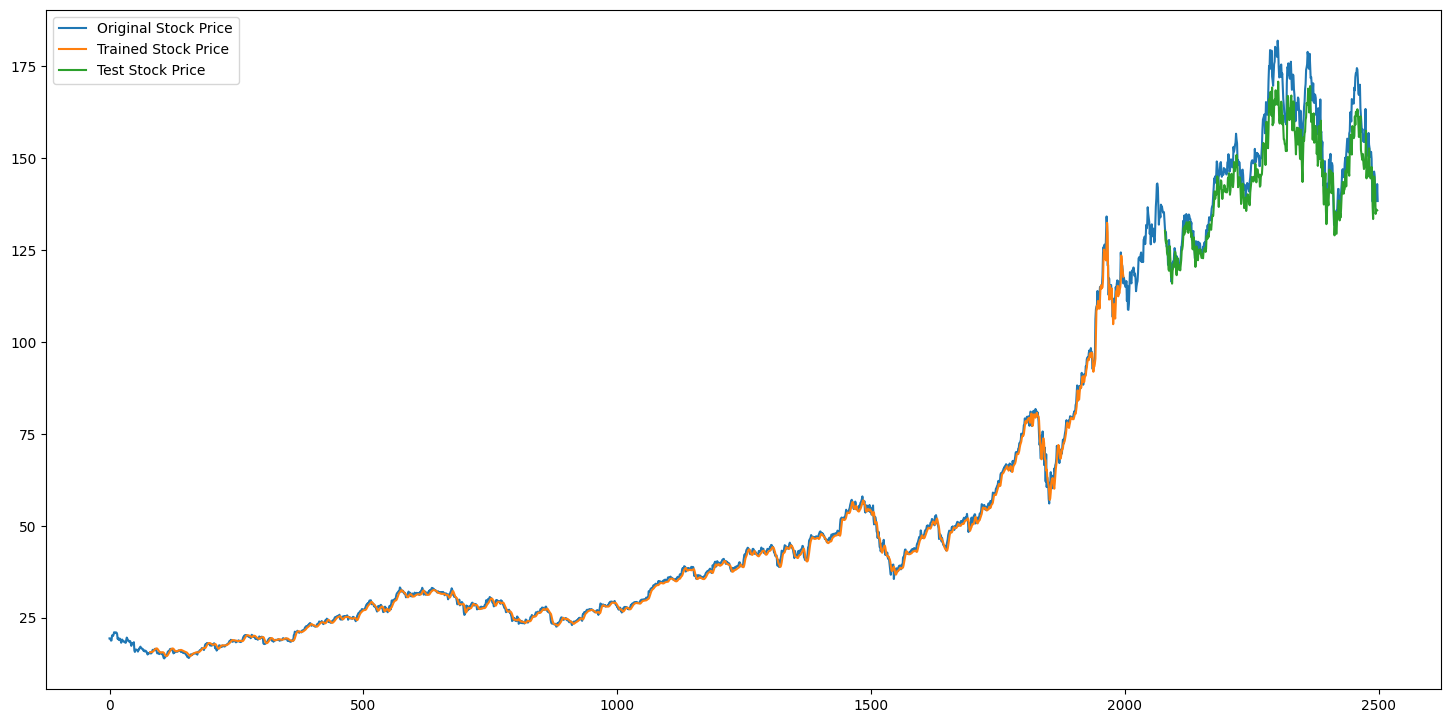

In [35]:
# plot baseline and predictions
plt.figure(dpi=100, figsize=(18, 9))
plt.plot(scaler.inverse_transform(df_close_values), label='Original Stock Price')
plt.plot(trainPredictPlot, label='Trained Stock Price')
plt.plot(testPredictPlot,  label='Test Stock Price')
plt.legend()
plt.show()

# Future Prediction

In [36]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
# demonstrate prediction for next 20 days
lst_output=[]
n_steps=time_step
i=0
while(i<20):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

[0.7264424]


In [39]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+21)

In [40]:
'''df3=df_close_values.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.figure(figsize=(8,4))
plt.plot(df3)'''

'df3=df_close_values.tolist()\ndf3.extend(lst_output)\ndf3=scaler.inverse_transform(df3).tolist()\nplt.figure(figsize=(8,4))\nplt.plot(df3)'

# Graphical Output

In [41]:
df4 = df.reset_index()['Close'].tolist()

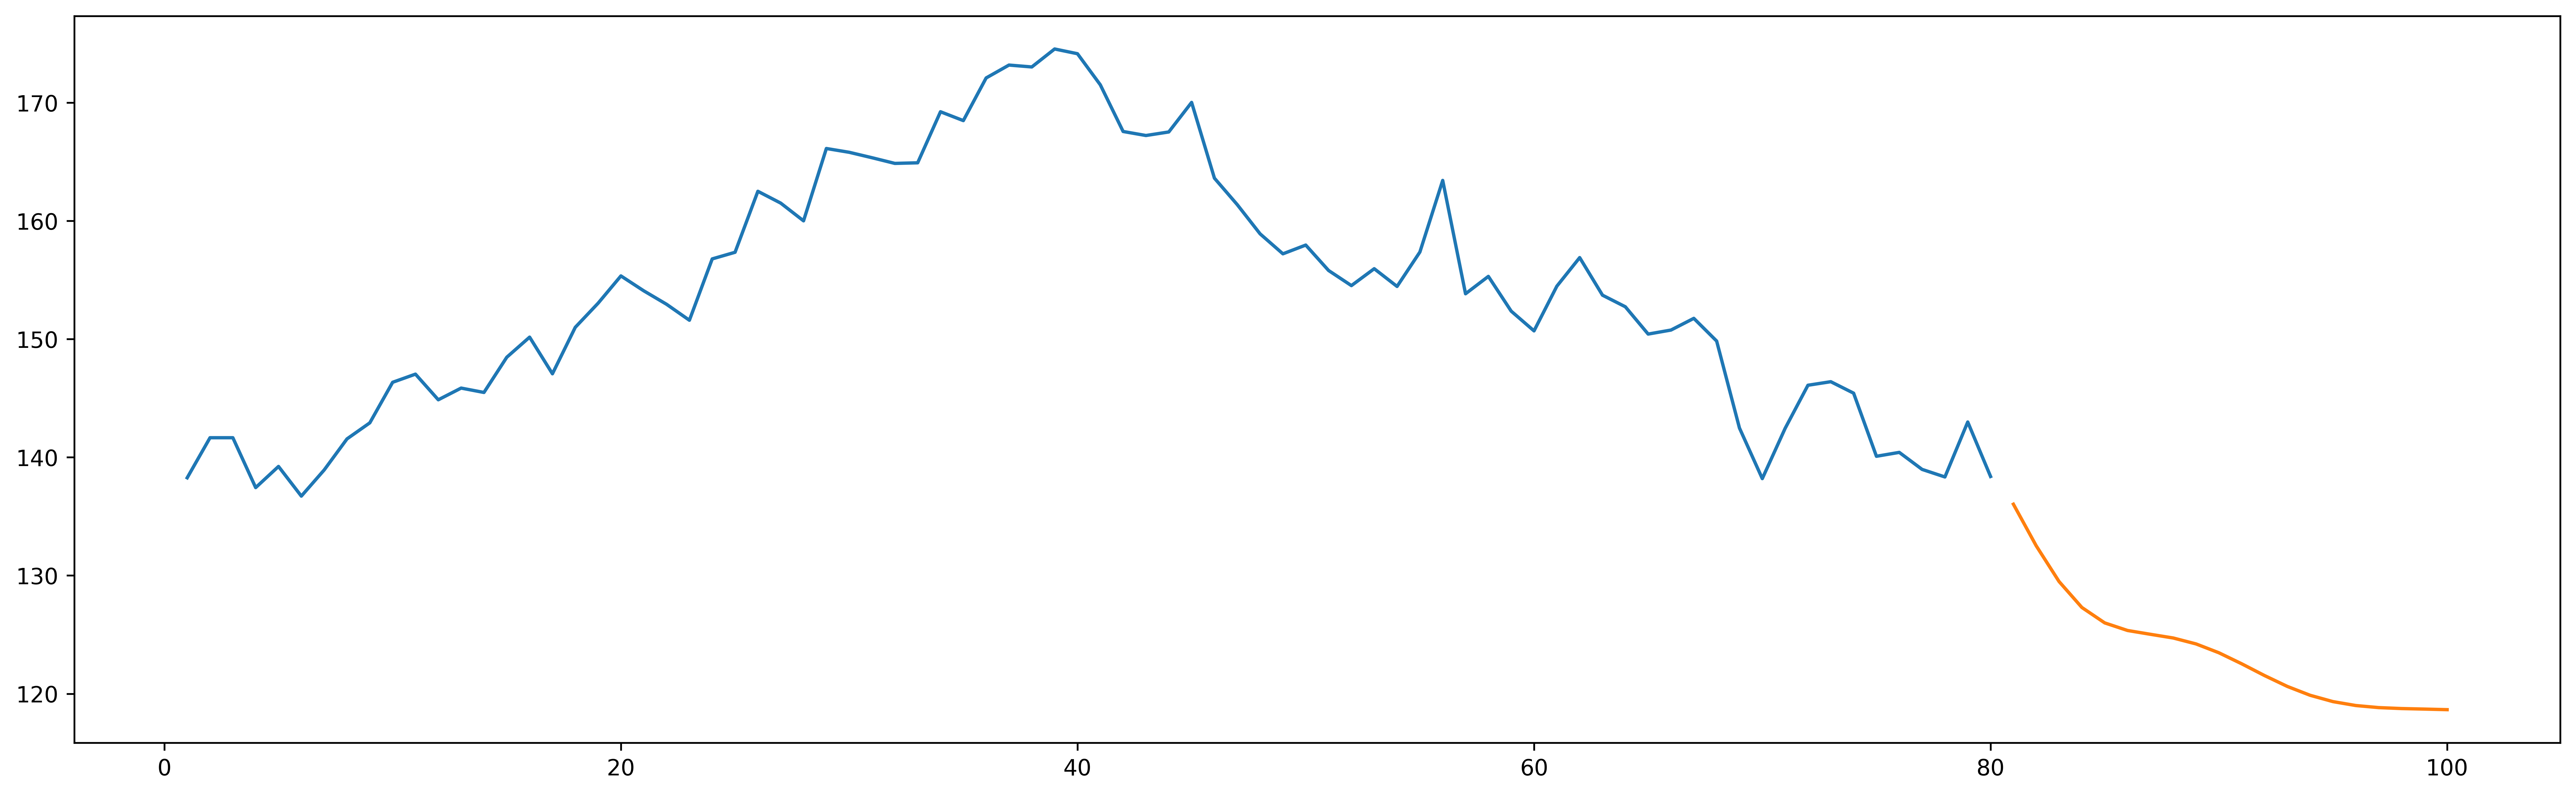

In [42]:
plt.figure(dpi=600, figsize=(20,6))

plt.plot(day_new,scaler.inverse_transform(df_close_values[len(df_close_values)-time_step:]) , label='STOCK PRICE')
plt.plot(day_pred,scaler.inverse_transform(lst_output) , label='FUTURE PREDICTED STOCK PRICE')

## GRAPHICAL COMPARSION WITH ORIGINAL VALUE

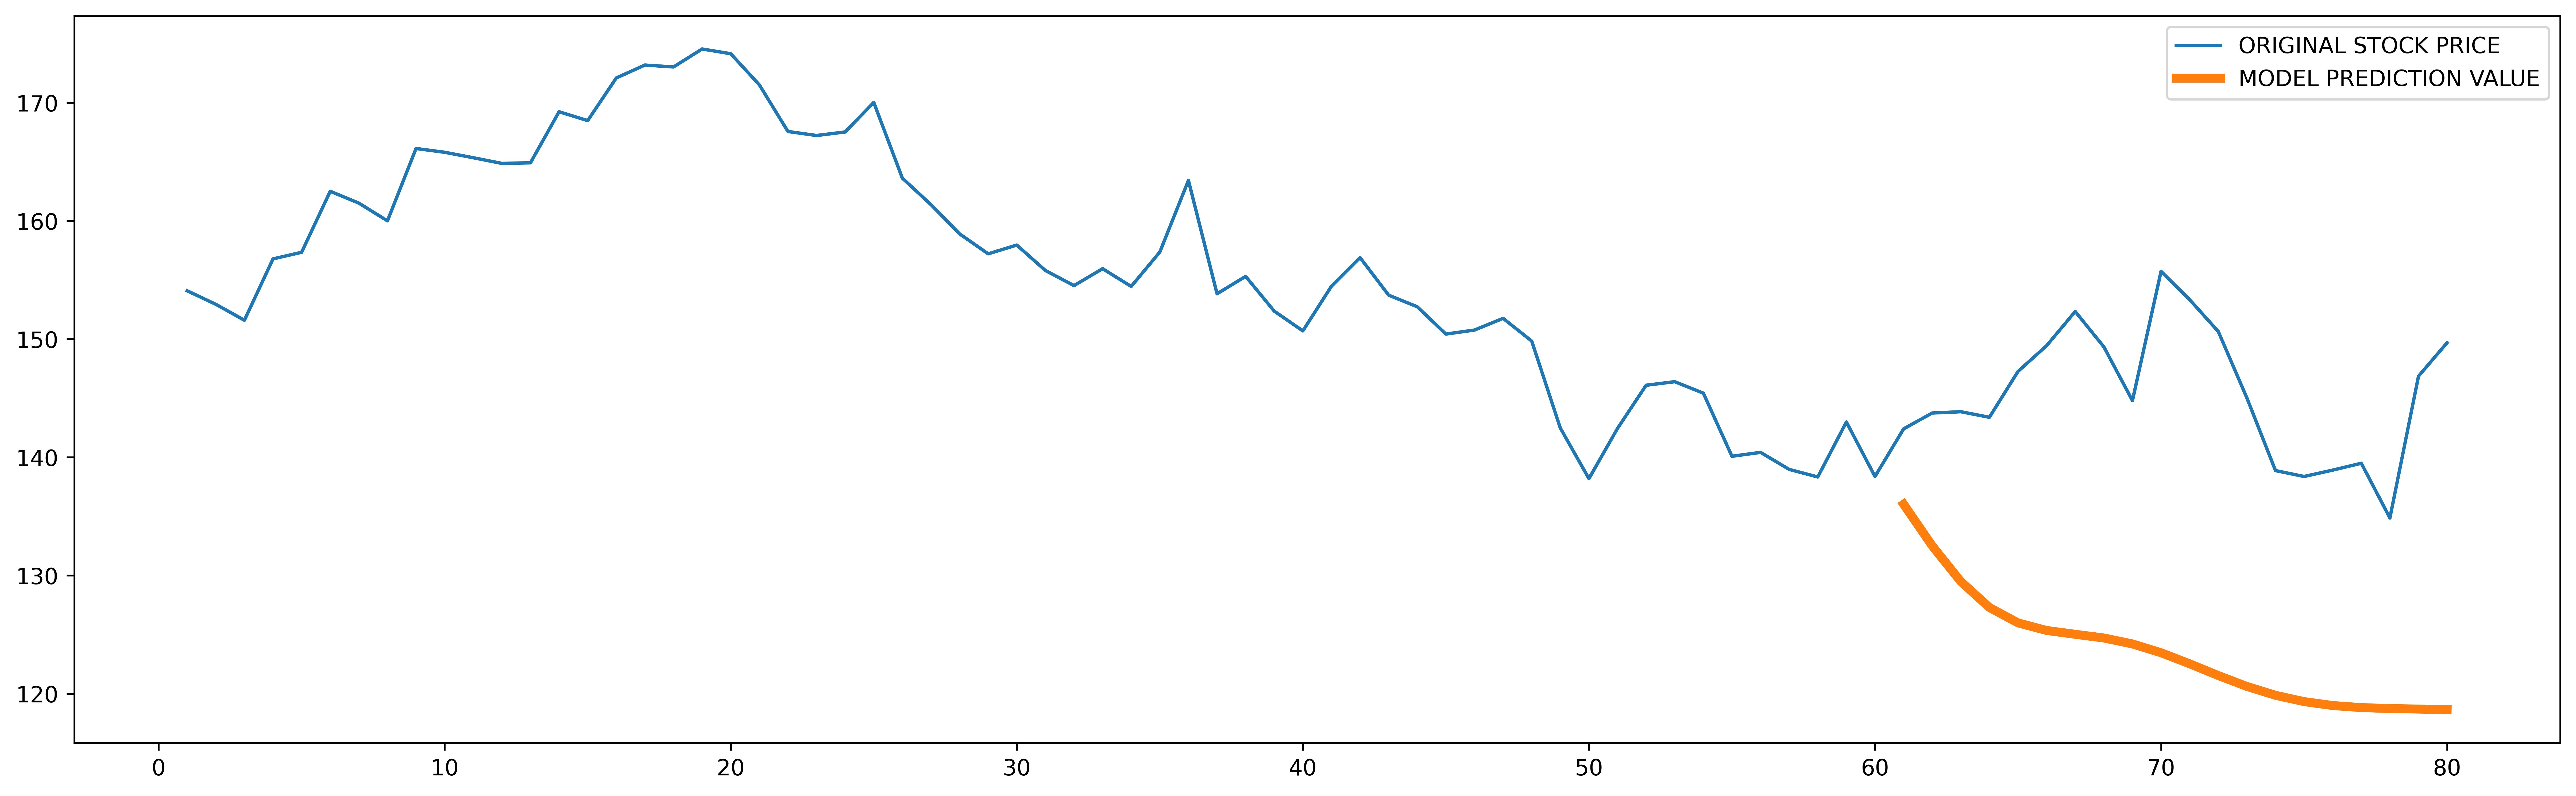

In [43]:
day_prediction = np.arange(time_step-19,time_step+1)

plt.figure(dpi=600, figsize=(20,6))

plt.plot(day_new,df4[len(df4)-time_step:], label='ORIGINAL STOCK PRICE')
plt.plot(day_prediction ,scaler.inverse_transform(lst_output) , label='MODEL PREDICTION VALUE', linewidth=4)
plt.legend()
plt.show()